In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
advertising = pd.read_csv(url)
advertising.shape

(200, 2)

In [3]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [4]:
input = np.array(advertising['TV'])
target = np.array(advertising['Sales'])

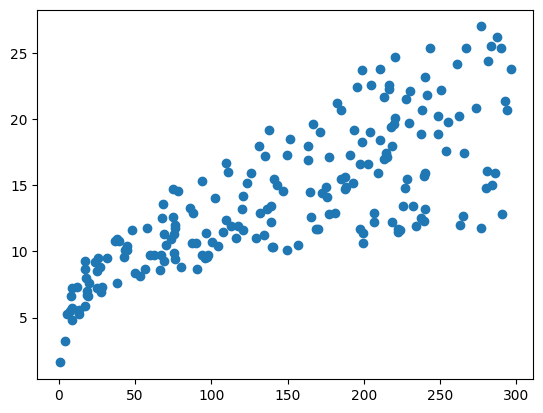

In [5]:
import matplotlib.pyplot as plt

plt.scatter(input, target)

In [19]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.25, random_state=42) # default : 0.25
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(150,) (50,) (150,) (50,)
(150, 1) (50, 1) (150,) (50,)


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(test_input, test_target))

0.6606120390330492


In [25]:
print(lr.coef_, lr.intercept_)

[0.04689446] 7.131784506685331


In [28]:
train_acc = lr.score(train_input, train_target)
test_acc = lr.score(test_input, test_target)
print(f"train 정확도 : {train_acc} / test 정확도 : {test_acc}")
print("Overfitting" if train_acc > test_acc else "Underfitting")

train 정확도 : 0.590700527532505 / test 정확도 : 0.6606120390330492
Underfitting


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(poly.get_feature_names_out())

(150, 2)
['x0' 'x0^2']


In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(test_poly, test_target))
print(lr.coef_, lr.intercept_)

train_acc = lr.score(train_poly, train_target)
test_acc = lr.score(test_poly, test_target)
print(f"train 정확도 : {train_acc} / test 정확도 : {test_acc}")
print("Overfitting" if train_acc > test_acc else "Underfitting")

0.6618033077912464
[ 6.90107836e-02 -7.56155041e-05] 6.061966689513023
train 정확도 : 0.5999679470020589 / test 정확도 : 0.6618033077912464
Underfitting


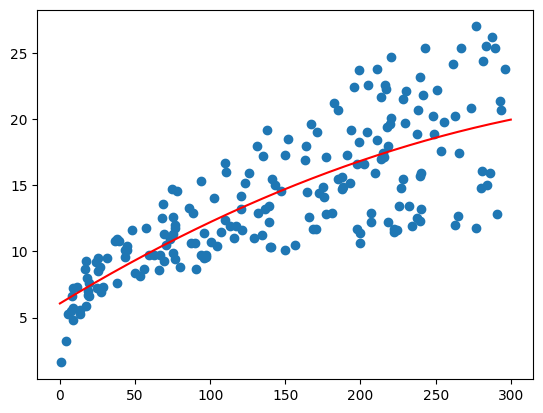

In [38]:
plt.scatter(input, target)
X = np.linspace(0,300,1000)
f=lambda x: lr.coef_[1] * x**2 + lr.coef_[0] * x + lr.intercept_
Y = f(X)
plt.plot(X, Y, 'r')

In [56]:
def experiment(degree, plot=True):
  poly = PolynomialFeatures(include_bias = False, degree=degree)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  test_poly = poly.transform(test_input)

  lr = LinearRegression()
  lr.fit(train_poly, train_target)

  train_acc = lr.score(train_poly, train_target)
  test_acc = lr.score(test_poly, test_target)

  if plot:
    plt.scatter(input, target)
    X = np.linspace(0,300,1000)
    def f(x):
      result = lr.intercept_
      for i,coef in enumerate(lr.coef_):
        result += coef * x**(i+1)
      return result
    Y = f(X)
    plt.plot(X, Y, 'r')

  return train_acc, test_acc, lr.coef_, lr.intercept_

In [68]:
for degree in range(2,125):
  train_acc,test_acc,_,_ = experiment(degree, plot=False)
  print(f"차수 : {degree} -> train : {train_acc} / test : {test_acc}")
  print(("\033[32mOverfitting" if train_acc > test_acc else "\033[31mUnderfitting")+'\033[0m')
  if train_acc > test_acc:
    break

차수 : 2 -> train : 0.5999679470020589 / test : 0.6618033077912464
Underfitting
차수 : 3 -> train : 0.6061726231861464 / test : 0.6525353432799894
Underfitting
차수 : 4 -> train : 0.6064943726921417 / test : 0.6544337490216534
Underfitting
차수 : 5 -> train : 0.6130611984611323 / test : 0.6577218233539799
Underfitting
차수 : 6 -> train : 0.6027070476790788 / test : 0.6589365828577979
Underfitting
차수 : 7 -> train : 0.5945094460371168 / test : 0.6461345241062816
Underfitting
차수 : 8 -> train : 0.586613305052295 / test : 0.6293837433609986
Underfitting
차수 : 9 -> train : 0.5766398419992936 / test : 0.6159068360749189
Underfitting
차수 : 10 -> train : 0.5643117349801245 / test : 0.6102788669832857
Underfitting
차수 : 11 -> train : 0.5502196069650972 / test : 0.6107350683353886
Underfitting
차수 : 12 -> train : 0.4791455371922586 / test : 0.5939067733430693
Underfitting
차수 : 13 -> train : 0.46112679987833616 / test : 0.5771812572939183
Underfitting
차수 : 14 -> train : 0.44412758374134054 / test : 0.5572366312

(0.6130611984611323,
 0.6577218233539799,
 array([ 2.95665384e-01, -4.43728201e-03,  3.47508958e-05, -1.23412756e-07,
         1.61193748e-10]),
 np.float64(3.0651996154477654))

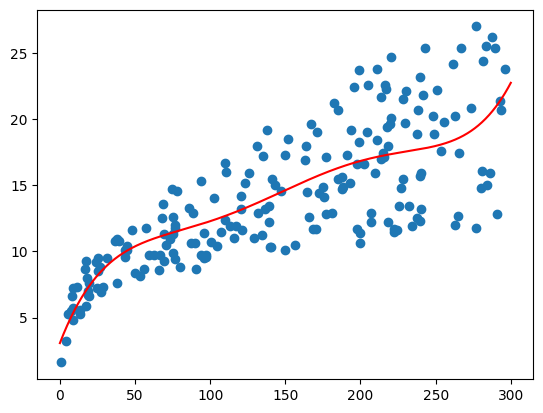

In [69]:
experiment(5)

(0.2551056690181026,
 0.25385079687684065,
 array([ 1.28828069e-066,  1.43938252e-067, -9.33832492e-071,
        -3.49097716e-075, -8.63616856e-078,  1.61998772e-109,
         1.60931654e-107,  3.77533151e-105,  8.79285744e-103,
         2.03340960e-100,  4.66771113e-098,  1.06288199e-095,
         2.39859272e-093,  5.35767267e-091,  1.18264811e-088,
         2.57471737e-086,  5.51453081e-084,  1.15825728e-081,
         2.37586510e-079,  4.73344074e-077,  9.09116665e-075,
         1.66549201e-072,  2.86475878e-070,  4.51177890e-068,
         6.22627411e-066,  6.88319313e-064,  4.76202919e-062,
        -4.95849684e-064,  1.72118430e-066, -1.99167351e-069]),
 np.float64(12.858812621961766))

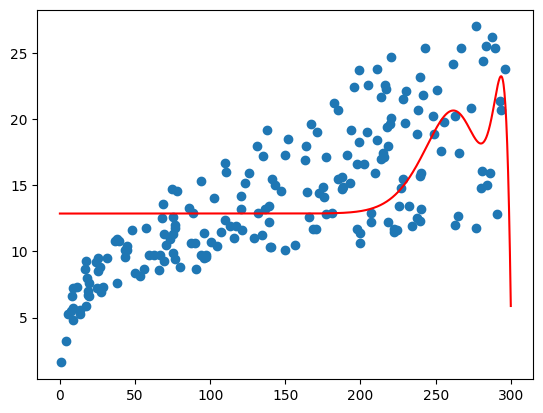

In [70]:
experiment(30)

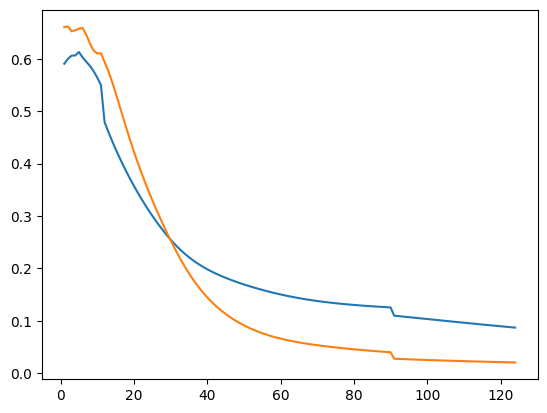

In [73]:
train_acc_list = []
test_acc_list = []
for degree in range(1,125):
  train_acc,test_acc,_,_ = experiment(degree, plot=False)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)

plt.plot(range(1,125),train_acc_list)
plt.plot(range(1,125),test_acc_list)